In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Oscillations_PMNS

In [2]:
Oscillation = Oscillations_PMNS.Oscillations()

In [3]:
print("P(nu_e -> nu_mu) = ", Oscillation.p(Oscillations_PMNS.nu_e, Oscillations_PMNS.nu_mu))
print( "Parameters used:")
print( Oscillation)

P(nu_e -> nu_mu) =  0.050689045368612885
Parameters used:
theta_12 = 33.90 degrees
theta_23 = 45.00 degrees
theta_13 = 9.10 degrees
(Delta m^2)_21 = 75.00 meV^2
(Delta m^2)_32 = 2320.00 meV^2
(Delta m^2)_31 = 2395.00 meV^2
L   = 295.0 km 
E   = 0.6 GeV
L/E = 491.67 km/GeV


In [4]:
vals = np.arange(35000)
prob_e_to_mu = []
prob_e_to_tau = []
prob_mu_to_e = []
prob_mu_to_tau = []
Oscillation.setE(1.0 * Oscillations_PMNS.units.GeV)

for x in range(0,len(vals)):
    Oscillation.setL(vals[x] * Oscillations_PMNS.units.km)
    prob_e_to_mu.append(Oscillation.p(Oscillations_PMNS.nu_e, Oscillations_PMNS.nu_mu))
    prob_e_to_tau.append(Oscillation.p(Oscillations_PMNS.nu_e, Oscillations_PMNS.nu_tau))
    
    prob_mu_to_e.append(Oscillation.p(Oscillations_PMNS.nu_mu, Oscillations_PMNS.nu_e))
    prob_mu_to_tau.append(Oscillation.p(Oscillations_PMNS.nu_mu, Oscillations_PMNS.nu_tau))
    
prob_e_to_mu   = np.array(prob_e_to_mu)
prob_e_to_tau  = np.array(prob_e_to_tau)
prob_mu_to_e   = np.array(prob_mu_to_e)
prob_mu_to_tau = np.array(prob_mu_to_tau)

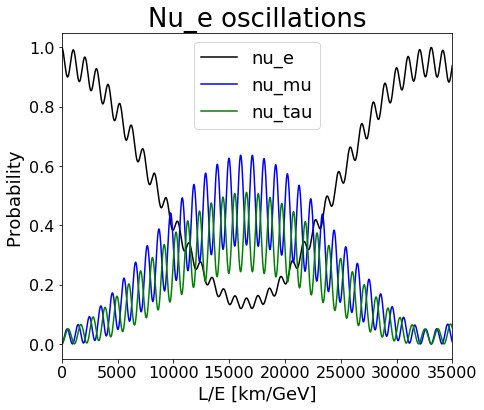

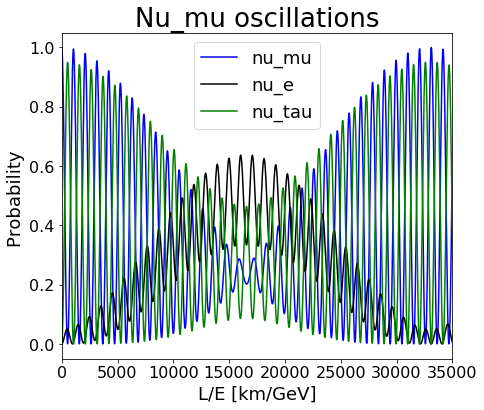

In [5]:
plt.figure(figsize=(7,6))
plt.title("Nu_e oscillations",fontsize=26)
plt.plot(vals,1-(prob_e_to_tau+prob_e_to_mu),color='k',label='nu_e')
plt.plot(vals,prob_e_to_mu,color='b',label='nu_mu')
plt.plot(vals,prob_e_to_tau,color='g',label='nu_tau')
plt.legend(loc='upper center',fontsize=18)
plt.xlabel("L/E [km/GeV]",fontsize=18)
plt.ylabel("Probability ",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,35000)
plt.show()


plt.figure(figsize=(7,6))
plt.title("Nu_mu oscillations",fontsize=26)
plt.plot(vals,1-(prob_mu_to_tau+prob_mu_to_e),color='b',label='nu_mu')
plt.plot(vals,prob_mu_to_e,color='k',label='nu_e')
plt.plot(vals,prob_mu_to_tau,color='g',label='nu_tau')
plt.legend(loc='upper center',fontsize=18)
plt.xlabel("L/E [km/GeV]",fontsize=18)
plt.ylabel("Probability ",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,35000)
plt.show()

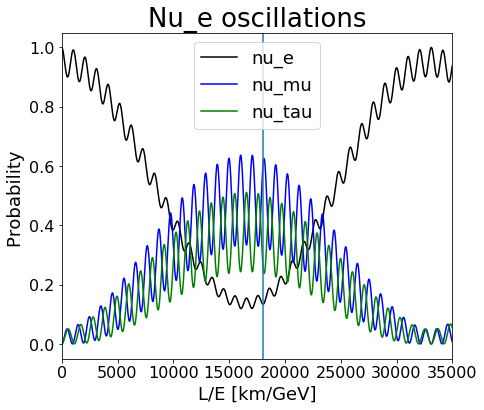

In [6]:
plt.figure(figsize=(7,6))
plt.title("Nu_e oscillations",fontsize=26)
plt.plot(vals,1-(prob_e_to_tau+prob_e_to_mu),color='k',label='nu_e')
plt.plot(vals,prob_e_to_mu,color='b',label='nu_mu')
plt.plot(vals,prob_e_to_tau,color='g',label='nu_tau')
plt.legend(loc='upper center',fontsize=18)
plt.xlabel("L/E [km/GeV]",fontsize=18)
plt.ylabel("Probability ",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,35000)
plt.axvline(180/0.01)
plt.show()



In [70]:
import torch

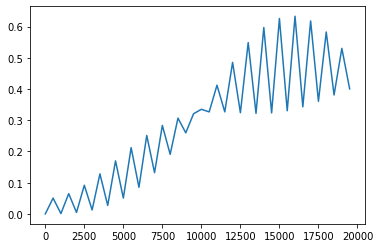

In [86]:
## making the torch data set for 0->20000 L/E
## with uniform points

prob_e_to_mu = []
prob_e_to_tau = []
E = 1
L = np.arange(0,20e3,500)
L = torch.from_numpy(L)
#L = np.random.uniform(low=0, high=20e3, size=50)
Oscillation.setE(E * Oscillations_PMNS.units.GeV)

for x in range(0,len(L)):
    Oscillation.setL(L[x] * Oscillations_PMNS.units.km)
    prob_e_to_mu.append(Oscillation.p(Oscillations_PMNS.nu_e, Oscillations_PMNS.nu_mu))
    prob_e_to_tau.append(Oscillation.p(Oscillations_PMNS.nu_e, Oscillations_PMNS.nu_tau))
    
prob_e_to_mu   = torch.FloatTensor(prob_e_to_mu)
prob_e_to_tau  = torch.FloatTensor(prob_e_to_tau)


plt.plot(L,prob_e_to_mu)


In [76]:
prob_e_to_mu

tensor([0.2428, 0.4447, 0.1797, 0.3402, 0.6043, 0.5379, 0.0277, 0.3724, 0.0888,
        0.5351, 0.3323, 0.0491, 0.6366, 0.2143, 0.6173, 0.1254, 0.0976, 0.4022,
        0.0276, 0.1048, 0.1943, 0.6270, 0.2624, 0.2636, 0.3851, 0.4732, 0.2665,
        0.6027, 0.0057, 0.1272, 0.3529, 0.0305, 0.3303, 0.0335, 0.1489, 0.2216,
        0.4235, 0.1967, 0.5017, 0.3700, 0.1519, 0.0119, 0.0589, 0.3822, 0.2191,
        0.6034, 0.1104, 0.4107, 0.1280, 0.6315])

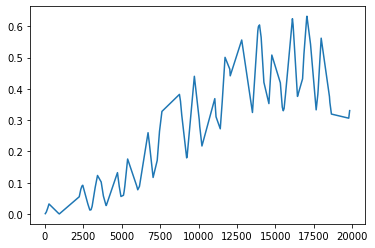

In [87]:
## making the torch data set for 0->20000 L/E
## with random points

prob_e_to_mu = []
prob_e_to_tau = []
E = 1
L = np.random.uniform(low=0, high=20e3, size=90)
L = torch.from_numpy(L)

Oscillation.setE(E * Oscillations_PMNS.units.GeV)

for x in range(0,len(L)):
    Oscillation.setL(L[x] * Oscillations_PMNS.units.km)
    prob_e_to_mu.append(Oscillation.p(Oscillations_PMNS.nu_e, Oscillations_PMNS.nu_mu))
    prob_e_to_tau.append(Oscillation.p(Oscillations_PMNS.nu_e, Oscillations_PMNS.nu_tau))
    
prob_e_to_mu   = torch.FloatTensor(prob_e_to_mu)
prob_e_to_tau  = torch.FloatTensor(prob_e_to_tau)


sort = np.argsort(L)
plt.plot(L[sort],prob_e_to_mu[sort])


In [62]:
def Two_nu_prob(theta, deltaM, L, E):
    fun = np.sin(2*theta)**2 * np.sin(1.27*(deltaM**2*L)/(E))**2
    return fun

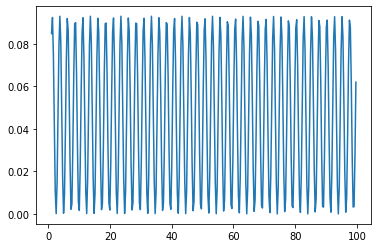

In [68]:
test = np.arange(1,100,0.3)
plt.plot(test,Two_nu_prob(30,100e-3,test,0.01))
